<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto; background-color:off white; position: relative;">
  <div class="alert alert-block alert-success" style="text-align:center; color:white; background-color:#1e2124 !important;">
    <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
    <h1>Universidade de Brasília</h1>
    <h2>Instituto de Física</h2>
    <hr style="width:44%;border:1px solid white;">
    <h3>Mini Curso de Inteligência Artificial para a Física</h3> 
    <h4>Henrique de Oliveira Noronha</h4>
    <hr style="width:44%;border:1px solid white;">
  </div>
  <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/logo_if.png" style="position: absolute; bottom: 20px; left: 40px; width: 100px;">
</div>


# **➲ Aula 1 - Introdução a Redes Neurais**

## ➥ O que são redes neurais?
---


Redes neurais são funções f: $\mathbb{R}^n$ $\rightarrow$ $\mathbb{R}^m$, onde n é a dimensão da entrada e m, a dimensão da saída. É importante notar que m e n podem ser produtos cartesianos, por exemplo, uma rede neural usada para classificar imagens em escala cinza de $64\times64$ pixels de diferentes animais. Nesse caso, a entrada possuiria dimensão $\mathbb{R}^{64\times64}$ e a saída $\mathbb{R}$. Também poderia ser feito um achatamento dos dados, resultando em um modelo $\mathbb{R}^{4096}$ $\rightarrow$ $\mathbb{R}$, e normalmente é o que é realizado na prática.

As principais tarefas de modelos de aprendizado de máquina são classificação e regressão. A classificação, como foi exemplificado anteriormente, é a tarefa de separar dados em classes distintas e discretas. A regressão, por outro lado, é a tarefa de prever valores contínuos a partir de valores de entrada, um exemplo seria o de atribuir um valor em porcentagem do risco para o banco de inadimplência de um empréstimo dado a um cliente. As entradas nesse caso poderiam ser, renda mensal, porcentagem de inadimplência passada, valor em dívidas, etc.

Apesar de existirem outras tarefas, como a geração de texto, focaremos na regressão para modelar sistemas físicos. Existem vários modelos de redes neurais, a mais básica e comum é a rede neural densamente conectada. Ela é formada por camadas de neurônios, em que cada neurônio da camada possui conexões com todos os neurônios da próxima camada. Isso se torna mais fácil de visualizar a partir de uma imagem:


<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/Densa.png" alt="camada_densa" width="500">
</div>

Nessa imagem, a camada à esquerda representa a entrada, composta por 3 neurônios. A camada à direita é a saída, composta por apenas 1 neurônio. Por fim, a camada intermediária é a única camada oculta do modelo. Ela é chamada de 'oculta' porque, apesar de ser responsável pelo aprendizado do modelo, sua atuação não é diretamente visível durante o uso da rede neural, já que apenas a entrada e a saída são observadas. Com isso, temos que esse é um modelo de $\mathbb{R}^3 \rightarrow \mathbb{R}$.

Cada um desses neurônios representam um número e essas conexões representa uma operação matemática. Vamos focar em um dos neurônios de ativação:

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/Zoom.png" alt="zoom_neuronio" width="700">
</div>

Podemos ver então que as conexões representam uma transformação afim. Considerando o vetor linha $\textbf{X} = (x_{1}, x_{2}, x_{3})$ e o vetor linha $\textbf{W}_{1} = (w_{11}, w_{21}, w_{31})$, então $h_{1} = A(\textbf{W}_{1}^{T} \textbf{X} + b_{1})$. A função A é normalmente uma função não linear facilmente derivável, como tanh, para as conexões em direção às camadas ocultas ou uma função identidade para as conexões em direção às camadas de saída. Os fatores multiplicativos $w_{j}$ são denominados pesos, e o fator aditivo $b_{1}$ é o viés.

Abaixo está um código com o exemplo acima, com os pesos e vieses gerados aleatoriamente entre -1 e 1:

In [217]:
import numpy as np

#Travar a semente para obter os mesmos resultados
np.random.seed(42)

#Vetores de peso da camada de entrada em direção à camada oculta
W11 = np.random.uniform(-1,1,size=3)
W12 = np.random.uniform(-1,1,size=3)
W13 = np.random.uniform(-1,1,size=3)
W14 = np.random.uniform(-1,1,size=3)

#Vieses da camada de entrada em direção à camada oculta
b11 = np.random.uniform(-1,1)
b12 = np.random.uniform(-1,1)
b13 = np.random.uniform(-1,1)
b14 = np.random.uniform(-1,1)

#Vetores de peso da camada oculta em direção à camada de saida
W21 = np.random.uniform(-1,1,size=4)

#Vieses da camada oculta em direção à camada de saída
b21 = np.random.uniform(-1,1)

#Agrupamento por camada
W1s = [W11,W12,W13,W14]
b1s = [b11,b12,b13,b14]
W2s =  [W21]
b2s = [b21]

#Valores de entrada X

X = np.array((0.5,0.8,0.1))

#Camada de entrada -> Camada oculta
z1s = []

for W in W1s:
    z=0
    for i in range(len(X)):
        z+=W[i]*X[i]
    z1s.append(z)

g1s = []

for i in range(len(b1s)):
    g1s.append(z1s[i]+b1s[i])

h1s = []

for i in range(len(g1s)):
    h1s.append(np.tanh(g1s[i]))

#Camada oculta -> Camada de saída
z2s = []

for W in W2s:
    z=0
    for i in range(len(h1s)):
        z+=W[i]*h1s[i]
    z2s.append(z)

g2s = []

for i in range(len(b2s)):
    g2s.append(z2s[i]+b2s[i])

h2s = []

for i in range(len(g2s)):
    h2s.append((g2s[i]))

print(f"Saída = {h2s[0]:.6f}")
    


Saída = 0.239921


Utilizando um pouco de álgebra linear, é possível reescrever essas operações em forma de multiplicações de matrizes e vetores. Para isso, nesse caso fazemos uma matriz de pesos W1, de dimensão (3,4), um vetor de vieses b1 de dimensão (4), um vetor de resultados da camada oculta H1, de dimensão (4), outra matriz de pesos W2, de dimensão (4) e um vetor de vieses B2 de dimensão (1):

In [218]:
W1 = np.stack(W1s,1)
B1 = np.stack(b1s,0)
H1 = np.tanh(np.matmul(X,W1)+B1)
W2 = np.stack(W2s,1)
B2 = np.stack(b2s,0)
H2 = np.matmul(H1,W2)+B2
print(f"Saída = {H2[0]:.6f}")


Saída = 0.239921


A seguir, apresento uma implementação orientada a objetos para generalizar para N camadas de dimensão qualquer, contanto que a dimensão de entrada e saída sejam números inteiros: 

In [219]:
class Camada:
    def __init__(self, unidades_esquerda, unidades_direita, ativacao, pesos):
        self.unidades_esquerda= unidades_esquerda
        self.unidades_direita = unidades_direita
        self.pesos = pesos
        self.ativacao = ativacao
        self.direita = None 
        
class Rede_neural:
    def __init__(self):
        self.input = None
    def inserir_camada(self,camada,unidades_esquerda,unidades, ativacao):
        if camada is None:
            if unidades_esquerda is None:
                return Camada(unidades_esquerda, unidades, ativacao, None)
            else:
                return Camada(unidades_esquerda, unidades, ativacao, [np.random.uniform(-1,1,size=(unidades_esquerda,unidades)),np.random.uniform(-1,1,size=(unidades))])
        else:
            unidades_atual = camada.unidades_direita
            camada.direita = self.inserir_camada(camada.direita,unidades_atual,unidades,ativacao)
            return camada
    def percorrer(self,camada,x):
        resultado = x
        if camada is not None and camada.pesos is not None:
            resultado = (camada.ativacao(np.matmul(x,camada.pesos[0])+camada.pesos[1]))
        if camada is None:
            return resultado
        return self.percorrer(camada.direita,resultado)
            


In [220]:
#Montando a rede neural
Rede = Rede_neural()
#Introduzindo a primeira camada com o método inserir_camada que tem como argumentos(Camada, Unidades à esquerda da camada (sempre None), (Unidades), função de ativação)
Rede.input = Rede.inserir_camada(Rede.input,None,3,None)
#Introduzindo as camadas ocultas
Rede.inserir_camada(Rede.input,None,64,lambda x: np.tanh(x))
Rede.inserir_camada(Rede.input,None,1,lambda x: x)
#Entrada
X = np.array(((1,2,3))).reshape(-1,3)
#Saída
print(Rede.percorrer(Rede.input,X))

[[1.76990801]]


## ➥ Como treinar a rede neural?
---

Agora que temos nossa rede neural, precisamos realizar a etapa mais importante do aprendizado de máquina: o próprio **aprendizado**. Mas, afinal, o que significa que um modelo aprendeu algo? Neste contexto, significa que ele é capaz de, ao receber determinados valores de entrada, produzir com precisão os valores de saída correspondentes. O objetivo final é que, mesmo ao receber novos valores de entrada — que não foram utilizados durante o treinamento — o modelo consiga prever saídas coerentes com a situação.

Certo, agora que entendemos o que significa treinar o modelo, temos que elaborar um algoritmo para isso. Para isso, vamos construir uma função L, denominada função de perda, que indica o quão bom o modelo está em relação aos dados de entrada e saída fornecidos. Uma função de perda natural seria:

\begin{equation*}
    L = \sum_{i=1}^{k}|saída_{i_{modelo}}- saída_{i_{esperada}}|
\end{equation*}

onde k são o número de saídas providenciadas para o treinamento. É possível notar que conforme a função L se aproxima de 0, todos os valores da saída do modelo tendem aos valores de saída esperados, que é justamente o que queremos. Logo, o objetivo agora é minimizar essa função de perda, para isso, precisamos achar o conjunto de pesos e vieses que fazem com que o modelo, ao receber como entrada os valores de entrada fornecidos, retorne o mais perto possível os valores de saída fornecidos. Quem sabe um pouco de cálculo, ao ler isso, talvez já pense em derivadas, em cálculo 1, aprendemos que para obtermos um mínimo de uma função f(x), temos que fazer f'(x) = 0, e se f''(x) > 0, esse é o mínimo da função. Porém, o processo se torna mais complexos conforme o número de variáveis que a função depende, pois conforme o número de variáveis aumenta, o número de mínimos locais tende a aumentar também. Nossa função de perda acima, por exemplo, depende de todos os pesos e todos os vieses da rede neural, e também das entradas e saídas fornecidas. Contudo, a derivada realmente vai exercer um papel fundamental no nosso algoritmo, especificamente, o gradiente. 

O gradiente de uma função de várias váriaveis $f = f(x_1,x_2,...x_n)$ é dado por $\nabla f = \frac{\partial f}{\partial x_1} \hat x_1 + \frac{\partial f}{\partial x_2} \hat x_2 + ... \frac{\partial f}{\partial x_n} \hat x_n$. Esse vetor indica a direção em que o valor da função aumenta mais rapidamente, por outro lado, $-\nabla f$ indica a direção em que o valor da função diminui mais rapidamente. Com isso, ao calcularmos o gradiente de L, vamos obter a direção em que o modelo aprende mais rápido, e podemos fazer os pesos e vieses "caminharem" em direção a eles. Para isso, estabelecemos um parâmetro pequeno $lr>0$ denominado $\textit{learning rate}$, ou taxa de aprendizagem, que controla o quanto os pesos e vieses vão se mover em direção a $-\nabla L$. O algoritmo então é:

\begin{equation*}
    w_i := w_i - lr*\frac{\partial L}{\partial w_i} 
\end{equation*}


\begin{equation*}
    b_i := b_i - lr*\frac{\partial L}{\partial b_i} 
\end{equation*}

# Método do gradiente
---
Vamos exemplificar o método do gradiente utilizando uma função simples de achar o mínimo e outra mais complicada, para demonstrar as fraquezas do método: 

In [221]:
import numpy as np
import matplotlib.pyplot as plt

Resultado final do método gradiente, x = -0.00005, y = 0.00018 f(x,y) = 0.00000


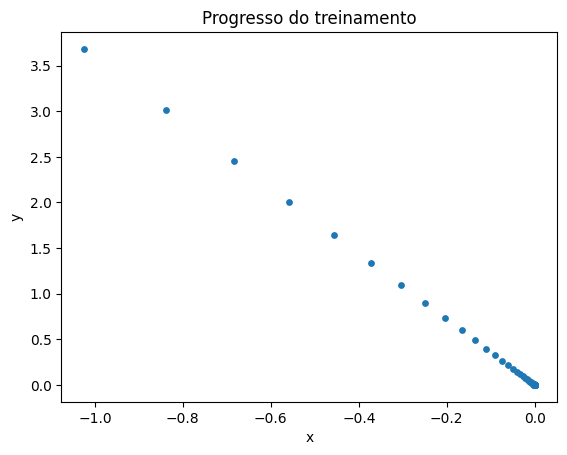

In [222]:
#Travar a semente para obter os mesmos resultados
np.random.seed(42)

# Função x²+y²
def simples(x,y):
    return x*x + y*y
# Retorna gradiente = (2*x,2*y)
def gradiente_simples(x,y):
    return np.array((2*x,2*y))

chutes_iniciais = np.random.uniform(-5,5,size=2)
lr = 0.01
resultados = np.copy(chutes_iniciais)
progresso = []

for i in range(500):
    resultados = resultados - lr*gradiente_simples(resultados[0],resultados[1])
    if (i+1)%10==0:
        progresso.append(resultados)

progresso = np.array(progresso)
plt.title("Progresso do treinamento")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(progresso[:,0],progresso[:,1],s=15)
print(f"Resultado final do método gradiente, x = {resultados[0]:.5f}, y = {resultados[1]:.5f} f(x,y) = {simples(resultados[0],resultados[1]):.5f}")
plt.show()




Como é possível observar, o nosso método possui uma falha clara: conforme as variáveis aproximam um mínimo (seja local ou global), os gradientes se tornam pequenos, o que faz com que o método demore a convergir para esse mínimo. Se fosse só isso, ainda estaria bom, esse problema, contudo, se torna um problemão no exemplo abaixo, com uma função mais complexa de obter o mínimo global: 

Resultado final do método gradiente, x = -0.00000, y = 4.90630 f(x,y) = 12.14480


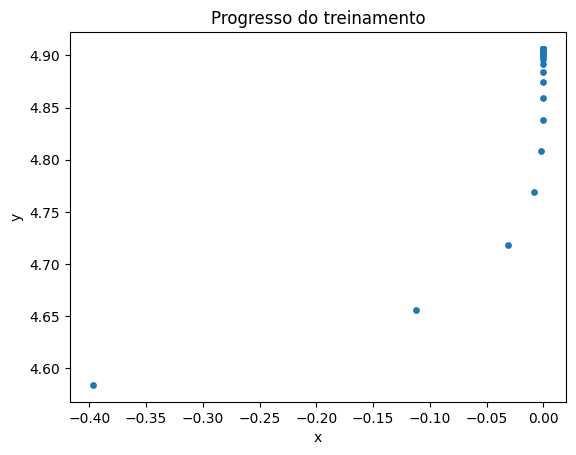

In [223]:
#Travar a semente para obter os mesmos resultados
np.random.seed(42)

# Função x²+y² - 10*(cos(x)+cos(y))
def complicada(x,y):
    return x*x+y*y - 10*(np.cos(x)+np.cos(y))
# Retorna gradiente = (2*x + 10*sen(x) , 2*y + 10*sen(y))
def gradiente_complicada(x,y):
    return np.array((2*x+10*np.sin(x),2*y+10*np.sin(y)))

chutes_iniciais = np.random.uniform(-5,5,size=2)
lr = 0.01
resultados = np.copy(chutes_iniciais)
progresso = []

for i in range(500):
    resultados = resultados - lr*gradiente_complicada(resultados[0],resultados[1])
    if (i+1)%10==0:
        progresso.append(resultados)

progresso = np.array(progresso)
plt.title("Progresso do treinamento")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(progresso[:,0],progresso[:,1],s=15)
print(f"Resultado final do método gradiente, x = {resultados[0]:.5f}, y = {resultados[1]:.5f} f(x,y) = {complicada(resultados[0],resultados[1]):.5f}")
plt.show()




O que está acontecendo nesse caso é que o nosso algoritmo ficou preso em um mínimo local, coisa que é fácil de ocorrer porque, se o chute inicial for próximo de um mínimo local, o oposto do gradiente vai apontar para ele e o algoritmo vai convergir para esse mínimo local, que por vezes tem um valor da função bem maior que o global, como é nesse caso, que o algoritmo convergiu para f(x,y) = 12.1, sendo que o mínimo global é de -20. Abaixo estão apresentados gráficos das funções apresentadas:

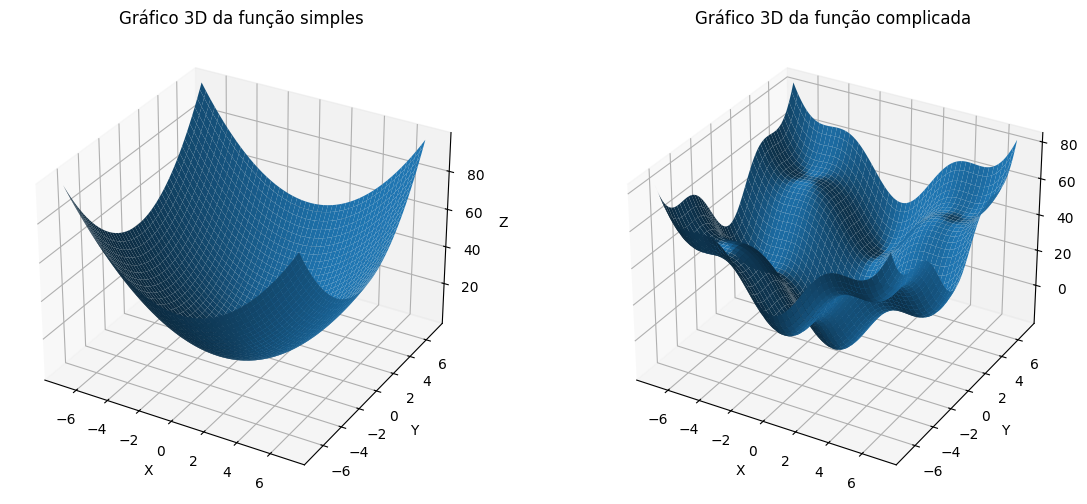

In [224]:
x = np.linspace(-7, 7, 200) 
y = np.linspace(-7, 7, 200)
X, Y = np.meshgrid(x, y)

Z_simples = simples(X, Y)
Z_complicada = complicada(X,Y)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax.plot_surface(X, Y, Z_simples)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico 3D da função simples')

ax2.plot_surface(X, Y, Z_complicada)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Gráfico 3D da função complicada')

plt.show()


Ao longo dos anos, foram desenvolvidos métodos e algoritmos para suprimir essas falhas, como o método do gradiente estocástico, aplicação de momento para a descida, otimizadores com a taxa de aprendizado variável, como o Adam, que são atualmente sempre utilizados no treinamento de redes neurais. Porém, a essência do aprendizado é essa, seguir a direção oposta dos gradientes em busca do mínimo da função de perda. O único problema, que não foi tratado até agora é de como conseguir esses gradientes, nos exemplos acima, eu derivei manualmente, isso se torna muito difícil de fazer para redes neurais, principalmente para as estruturas mais complexas como LSTMs e Transformers, e calcular esses gradientes numericamente, por diferenças finitas, por exemplo, introduz erro numérico no treinamento que vai se acumulando conforme o treinamento progride. A solução, — e o motivo para as bibliotecas de alto nível, como TensorFlow e PyTorch serem tão populares — é a **diferenciação automática**. 

A autodiferenciação é uma técnica que obtém as derivadas parciais de funções feita por um computador através da análise de como as funções são feitas pelo computador, que as executa, na prática, através de múltiplas operações mais básicas, como a soma, ou de funções elementares (seno, exponencial, etc). Então, a autodiferenciação usa a regra da cadeia nessas funções, a partir do conhecimento prévio do computador do resultado das derivadas das operações simples. Esse método produz derivadas exatas, equivalente à derivação simbólica, mas com o custo computacional muito mais reduzido, e dependendo do uso, ela pode ser utilizada em modo *forward* ou *reverse*, dependendo do problema. O modo *reverse* é mais eficiente para funções $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$, onde $n\gg m$, como é o caso das funções de perda. A aplicação desse modo otimiza ainda mais o cálculo dos gradientes para o uso em redes neurais.

## ➥ Introdução ao TensorFlow
---

O aprendizado de máquina e inteligência artificial hoje em dia é, em geral, realizado utilizando bibliotecas de alto nível, como **TensorFlow, Pytorch e JAX**, que permitem que os usuários utilizem as ferramentas imbutidas de diferenciação automática e integração de GPUs para acelerar o treinamento e previsão de modelos de redes neurais.

Esse curso será realizado com o tensorflow e Keras, porém, tudo que está neste curso pode ser feito de forma análoga nas outras bibliotecas, claro, que mudando a estrutura para condizer com a estrutura da biblioteca utilizada.

No tensorflow há 3 tipos principais de variáveis,

$\hspace{10px}\bullet$ Variables, que podem ser modificadas, ou treinadas;$\\$
$\hspace{10px}\bullet$ constants, que são imutáveis;$\\$
$\hspace{10px}\bullet$ tensor que também são imutáveis e são o tipo padrão e mais utilizado internamente.


Primeiramente, vamos ver como é realizada a autodiferenciação no TensorFlow. A diferenciação automática é feita a partir da estrutura do GradientTape, ela é basicamente um mini ambiente que você abre e o TensorFlow grava as operações realizadas nele para poder providenciar as derivadas parciais. Abaixo está um código exemplificando os pontos mais importantes desse ambiente:

In [225]:
import tensorflow as tf

# Declaração de variáveis
x = tf.convert_to_tensor(1.2) # variável tipo tensor
y = tf.Variable(2.0) # variavel tipo Variable
z = tf.constant(3.5) # variável tipo constant
resultado_teste = 2*x*y+4*z*y

# Abrindo a fita
with tf.GradientTape() as fita:
    gradiente = fita.gradient(resultado_teste,y) # Gradiente do resultado_teste em relação a y
    print(gradiente) # Note que o resultado é None, pois a operação do resultado_teste foi feita fora da fita, então ela não foi gravada pelo tensorflow para providenciar os gradientes
    
# Abrindo a fita novamente, mas fazendo a operação dentro do contexto da fita
with tf.GradientTape() as fita:
    resultado_teste = 2*x*y+4*z*y
    gradiente = fita.gradient(resultado_teste,y) 
    print(gradiente) # Deu certo dessa vez, printa um tensor de valor 16.4 = 2*x + 4*z 
    
# Vamos testar as outras derivadas parciais
with tf.GradientTape() as fita:
    resultado_teste = 2*x*y+4*z*y
    gradiente = fita.gradient(resultado_teste,x) 
    print(gradiente) 
    # Novamente, o resultado é None, o tensorflow sempre observa as variáveis do tipo Variable, como o y, por isso que quando derivamos com respeito a ele deu certo. 
    # Mas quando tentamos derivar em relação a x ou a z, o tensorflow não observa tensores e constantes por padrão, por isso, temos que mandar ele observá-los antes de derivar em relação a eles.

with tf.GradientTape() as fita:
    fita.watch(x)
    resultado_teste = 2*x*y+4*z*y
    gradiente = fita.gradient(resultado_teste,x) 
    print(gradiente) # Deu certo dessa vez, printa um tensor de valor 4.0 = 2*y
    
with tf.GradientTape() as fita:
    fita.watch(z)
    resultado_teste = 2*x*y+4*z*y
    gradiente = fita.gradient(resultado_teste,z) 
    print(gradiente) # Deu certo dessa vez, printa um tensor de valor 8.0 = 4*y

None
tf.Tensor(16.4, shape=(), dtype=float32)
None
tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


Vamos tentar agora obter derivadas parciais de segunda ordem:

In [226]:
import tensorflow as tf

# Declaração de variáveis
x = tf.convert_to_tensor(1.2) # variável tipo tensor
y = tf.Variable(2.0) # variavel tipo Variable
z = tf.constant(3.5) # variável tipo constant

with tf.GradientTape() as fita:
    fita.watch(x)
    fita.watch(z)
    resultado_teste = 2*x*y+4*z*y
    gradiente_x = fita.gradient(resultado_teste,x) 
    print(gradiente_x) 
    gradiente_z = fita.gradient(resultado_teste,z)
    print(gradiente_z)
    # Isso não dá certo, se você rodar o programa, vai dar erro e falar que um GradientTape não persistente só pode computar um conjunto de gradientes (ou jacobianos)

tf.Tensor(4.0, shape=(), dtype=float32)


RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

Para obter gradientes de segunda ordem ou mais, podemos ou aninhar fitas, ou usar o GradientTape em modo persistente. No modo persistente, a fita grava muitas operações, para poder providenciar gradientes de maior ordem. Como isso consome mais memória, deve ser feito com cuidado e somente quando necessário:

In [227]:
import tensorflow as tf

# Declaração de variáveis
x = tf.convert_to_tensor(1.2) # variável tipo tensor
y = tf.Variable(2.0) # variavel tipo Variable
z = tf.constant(3.5) # variável tipo constant

# Gradientes diferentes de primeira ordem utilizando fitas aninhadas
with tf.GradientTape() as fita_externa:
    fita_externa.watch(z)
    with tf.GradientTape() as fita_interna:
        fita_interna.watch(x)
        resultado_teste = 2*x*y+4*z*y
        gradiente_x = fita_interna.gradient(resultado_teste,x) 
        print(gradiente_x) 
    gradiente_z = fita_externa.gradient(resultado_teste,z)
    print(gradiente_z)
    
# Gradiente de segunda ordem de x   
with tf.GradientTape() as fita_externa:
    fita_externa.watch(x)
    with tf.GradientTape() as fita_interna:
        fita_interna.watch(x)
        resultado_teste = 2*x*y+4*z*y
        gradiente_x = fita_interna.gradient(resultado_teste,x) 
        print(gradiente_x) 
    gradiente2_x = fita_externa.gradient(gradiente_x,x)
    print(gradiente2_x) # Dá certo, retorna None, ao invés de 0 pois é mais eficiente para o tensorflow, na hora do treinamento. Caso o gradiente seja None, o tensorflow só vai ignorar esse gradiente, que é o que aconteceria se fosse 0 de qualquer forma.
    
    
with tf.GradientTape(persistent=True) as fita_persistente:
    fita_persistente.watch(x)
    resultado_teste = 2*x*y+4*z*y
    gradiente_x = fita_persistente.gradient(resultado_teste,x)
    gradiente2_x = fita_persistente.gradient(gradiente_x,x)
    print(gradiente2_x) # Também dá certo


tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
None
None


Com o entendimento de como a autodiferenciação é feita, que utilizaremos depois, podemos partir para o modo mais simples de constuir e treinar um modelo de rede neural. Não precisamos realizar manualmente nenhuma autodiferenciação nesse caso, o tensorflow lida com tudo sozinho.

Para isso, farei um exemplo explicativo de regressão: treinar uma rede neural que tome como entrada 1 ponto no tempo no espaço de fase do oscilador harmônico e retorne o ponto seguinte. Isto é, $(x_i,p_i) \rightarrow (x_{i+1},p_{i+1})$. Como a rede neural precisa de entradas e saídas para o treinamento, serão calculadas 50 pontos no espaço de fase para o treinamento, de forma que a entrada de treinamento tenha dimensão (50,2). A forma como as redes neurais são estruturadas permitem que todos os pontos desse tensor de rank 2 possam ser utilizados em paralelo para calcular os gradientes do método do gradiente, por isso que GPUs são tão utilizadas em IA.  

In [228]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

Primeiramente, vamos obter a solução numérica com a biblioteca scipy, utilizando o *odeint*.

In [229]:
# Definir a função para resolver com ode int
def oscilador_harmonico(y,t,k,m):
    x = y[0]
    v = y[1]
    dvdt = -k/m*x
    return [v,dvdt]

# Fixar semente para obter mesmos resultados
np.random.seed(42)
condicoes_iniciais = [2.4,0.5]
dt = 0.01
t = np.arange(0,10+dt,dt)
k = 0.5
m = 1.0
solucao = odeint(oscilador_harmonico, condicoes_iniciais, t, args=(k,m))
posicoes = solucao[:,0]
momentos = solucao[:,1]*m


#Vamos pegar 50 pontos aleatórios entre todos, para isso, vamos escoher 50 indices aleatorios para a entrada e depois disso, somar 1 nos indices e obter as saídas
indices = np.arange(0,len(posicoes)-2) # Subtrair 2 pois queremos evitar escolher o último
indices_entrada = np.random.choice(indices,50,replace=False) # Escolher 50 aleatorios, sem ser iguais (replace=False)
indices_saida = indices_entrada+1

entrada = np.stack((posicoes[indices_entrada],momentos[indices_entrada]),axis=1) # Fazer array (50,2)
saida = np.stack((posicoes[indices_saida],momentos[indices_saida]),axis=1) # Fazer array (50,2)

Ótimo, agora, vamos montar nosso modelo, compilar ele, especificando o otimizador a ser utilizado, a função de perda e alguma eventual métrica adicional que queiramos visualizar no treinamento. A compilação a seguir é a mais comum de ser utilizada, pois utiliza o otimizador mais eficiente e versátil atualmente, o ADAM, e a função de perda mais comum nos treinamentos de regressão, a MSE (erro médio quadrático), que é definida assim para n entradas dadas:

\begin{equation*}
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{saida}-y_{dado})^2
\end{equation*}

Vamos testar um modelo com uma camada de entrada, uma intermediária de treinamento com 32 neurônios, e uma final de saída. 

In [236]:
modelo = Sequential([Input(2,),
                     Dense(32),
                     Dense(32),
                     Dense(2)])

modelo.compile(optimizer="adam",loss="mse",metrics=["mae"]) # Compilar o modelo com ADAM, função de perda MSE e vamos observar a MAE (erro absoluto médio)

Com o modelo compilado, podemos treiná-lo, para isso, precisamos escolher o número de epochs, isto é, o número de vezes que atualizaremos os pesos, ou de outra forma, o número de loops do método gradiente. Também precisamos escolher o batch_size, que é o número de pontos dos nossos dados de treinamento que vamos utilizar em cada pacote de dados que o tensorflow usa para treinar o modelo. Escolher esse número é importante pois se sempre pegassemos o número total de dados fornecidos, se fossem fornecidos muitos dados, possivelmente faltaria memória para alocar todos os passos utilizados no cálculo dos gradientes e haveria um overflow. Assim como a grande maioria de parâmetros no aprendizado de máquina, o valor ideal para ele é descoberto na tentativa e erro para a situação atual e para sua configuração do computador. Um bom valor genérico é 32, ou alguma outra potência de 2.

In [237]:
modelo.fit(entrada,saida,epochs=300, batch_size=32)

Epoch 1/300
2/2 [==============================] - 0s 2ms/step - loss: 0.9652 - mae: 0.8046
Epoch 2/300
2/2 [==============================] - 0s 4ms/step - loss: 0.6848 - mae: 0.6744
Epoch 3/300
2/2 [==============================] - 0s 3ms/step - loss: 0.4549 - mae: 0.5486
Epoch 4/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2781 - mae: 0.4271
Epoch 5/300
2/2 [==============================] - 0s 3ms/step - loss: 0.1431 - mae: 0.3062
Epoch 6/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0633 - mae: 0.2007
Epoch 7/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - mae: 0.1068
Epoch 8/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0589
Epoch 9/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0817
Epoch 10/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - mae: 0.1274
Epoch 11/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0410 

Vamos verificar se nosso modelo realmente aprendeu, fazendo ele prever iterativamente a partir da posição inicial do espaço de fase até 20s, o dobro do tempo da simulação inicial:

In [238]:
entrada_inicial = np.array((posicoes[0],momentos[0])).reshape(1,2)
previsoes = [entrada_inicial]
for i in range(5000):
    previsoes.append(modelo(previsoes[i],training = False))

previsoes_ = np.concatenate(previsoes)

In [239]:
print(f"Máximo das previsões da posição do modelo: {np.max(previsoes_[:,0]):.5f}, Máximo das posições originais: {np.max(posicoes):.5f}")
print(f"Máximo das previsões do momento do modelo: {np.max(previsoes_[:,1]):.5f}, Máximo dos momentos originais: {np.max(momentos):.5f}")

Máximo das previsões da posição do modelo: 2.50470, Máximo das posições originais: 2.50200
Máximo das previsões do momento do modelo: 1.65959, Máximo dos momentos originais: 1.76918


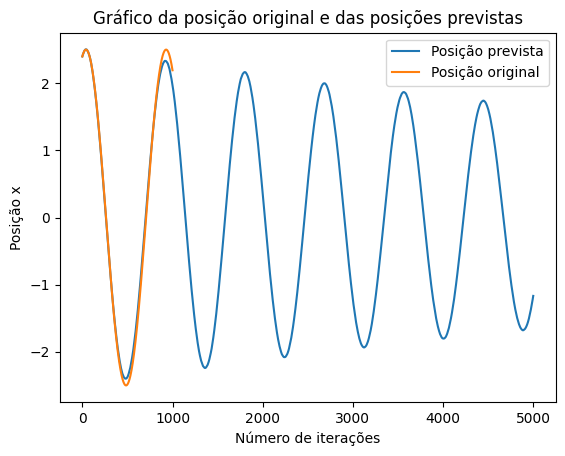

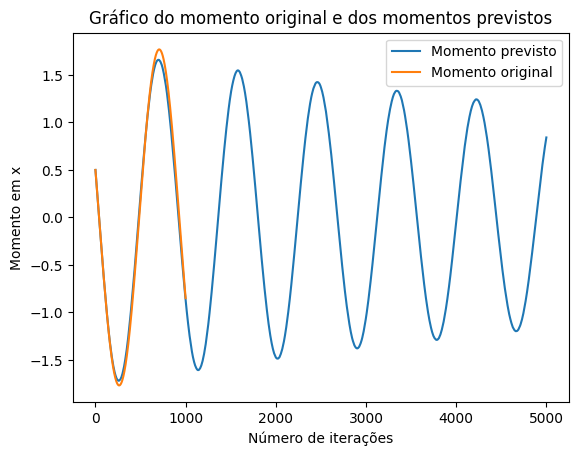

In [240]:
plt.plot(previsoes_[:,0], label = "Posição prevista")
plt.plot(posicoes, label="Posição original")
plt.title("Gráfico da posição original e das posições previstas")
plt.ylabel("Posição x")
plt.xlabel("Número de iterações")
plt.legend()
plt.show()

plt.plot(previsoes_[:,1], label = "Momento previsto")
plt.plot(momentos, label = "Momento original")
plt.title("Gráfico do momento original e dos momentos previstos")
plt.ylabel("Momento em x")
plt.xlabel("Número de iterações")
plt.legend()
plt.show()

Podemos observar que o modelo não conseguiu entender perfeitamente o comportamento do oscilador harmônico, pois ele apresenta um amortecimento que não era para existir nesse caso. Isso pode ser remediado, ou configurando melhor o modelo e o método de treinamento, ou provendo mais dados para o modelo. Enquanto a primeira alternativa nem sempre dá resultados muito melhores, a segunda sempre melhora o entendimento do modelo, se os dados providenciados evidenciam de fato o comportamento do modelo. 

É importante ter certeza que o que você está "alimentando" o seu modelo, representa a sua situação, por exemplo se tivermos uma função que começa totalmente linear e depois fica quadrática, se eu somente pegar dados na parte linear, o modelo achará que a função será toda linear e convergirá para isso. 

## Exemplos sem sucesso ($\pi$, Primos)